# The logistic map, chaos, and fractals
**David I. Ketcheson dketch@gmail.com**

**May 25, 2015**

I first learned about chaotic dynamics by reading James Gleick's book 
[Chaos - making a new science](http://en.wikipedia.org/wiki/Chaos:_Making_a_New_Science)
when I was 15.  It left a deep impression on me, and heightened
my growing love of mathematics.  The stories that most stand out in my mind,
20 years later, iare his account of Robert May's computational experiments with
the logistic map and Feigenbaum's discovery of [the first of the constants named after him](http://en.wikipedia.org/wiki/Feigenbaum_constants).  The pictures in that chapter have stuck with me and still
impress me with their complexity that flows from such a simple source.

## The logistic map
Consider the very simple equation:

$$x_{n+1} = r x_n (1-x_n).$$

Among other applications, this has been used as a simple model for population dynamics; roughly speaking, the factor $r x_n$ accounts for reproduction, while the factor $1-x_n$ accounts for overpopulation.
If we pick some parameter $r$ and some initial value $x_0$, then this equation, known as the *logistic map*, generates an infinite sequence of values $x_1, x_2, \dots$.  A natural question is, **what happens to the values $x_n$ as $n$ gets large?**

What kinds of behavior are possible?  The following are some obvious possibilities:

1. The values $x_n$ get closer and closer to some limit value $x_\infty$ as $n\to \infty$.

2. The values $x_n$ oscillate periodically among two or more values, repeating those values forever.

3. The values $x_n$ get larger and larger without bound.

We will avoid case #3 by taking $0<x_0<1$ and $0<r<4$ (*why does this ensure that the sequence remains bounded?*).  Now let's experiment.

In [49]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML
from IPython.html import widgets
from IPython.html.widgets import interact, interactive, fixed

size = (12,6)
#import mpld3
#mpld3.enable_notebook()  # This doesn't work with plots of so many points -- it's too slow


Here's a bit of code to compute a sequence of values $x_0,\dots,x_N$:

In [50]:
def logistic_map_sequence(r=1.0, N = 100, x0=0.6):
    x = np.zeros(N)
    x[0] = x0
    for n in range(N-1):
        x[n+1] = r * x[n] * (1. - x[n])
    return x


Let's print out a few values:

In [51]:
x = logistic_map_sequence()
print(x[:10])


[ 0.6         0.24        0.1824      0.14913024  0.12689041  0.11078923
  0.09851498  0.08880978  0.0809226   0.07437413]


It looks like they're getting smaller and smaller.  By plotting them, we can see the behavior better.

### Plotting one sequence

In [52]:
def plot_logistic(i,x):
    plt.figure(figsize=size)
    plt.plot(x[:i],'-ok',linewidth=2)
    plt.ylim(0,1); plt.xlim(0,len(x))


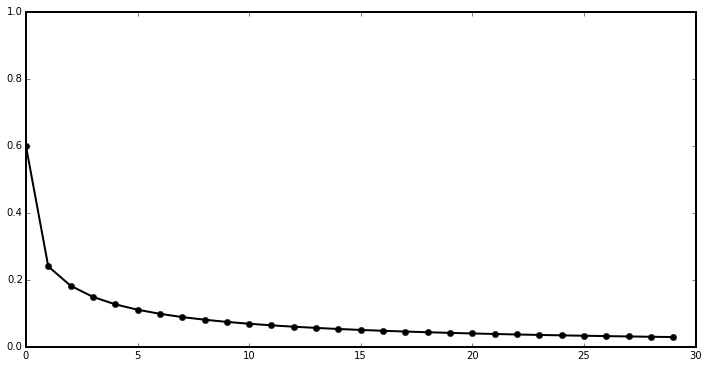

In [53]:
x = logistic_map_sequence(r=1.0,N=30)
plot_logistic(len(x),x)


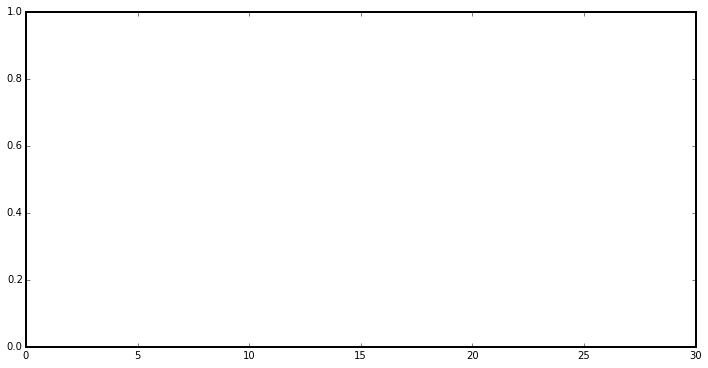

In [54]:
interact(plot_logistic,i=widgets.IntSliderWidget(min=0,max=len(x),step=1,value=0),x=fixed(x));


It seems that for these values of $r$ and $x_0$, we are in situation #1, with the limit value $x_\infty = 0$.  Can we be sure?  

Yes.  For $r=1$, the logistic equation is just:

$$x_{n+1} = x_n (1-x_n)$$

If $x_0$ is between 0 and 1, then obviously it will stay in that interval
forever.  And at each step we multiply $x_n$ by a number smaller than 1, so we
get a smaller number for $x_{n+1}$.  Finally, notice that if $x_n=0$, then
$x_{n+1}=0$.  Of course, if we start with a value $x_0$ greater than zero, then
this will never happen, but each successive value of $x_n$ will be closer to
zero than the last.

### Playing with the parameter
What happens if we take $r$ a bit larger?

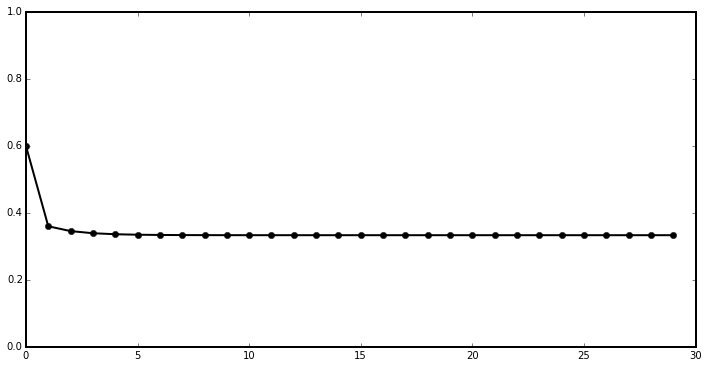

In [55]:
x = logistic_map_sequence(r=1.5,N=30)
plot_logistic(len(x),x)


Again, $x_n$ seems to approach some constant value, but now it isn't zero.  What value is it?  We have

$$x_{n+1} = \frac{3}{2} x_n (1-x_n)$$

We can find the fixed point by supposing that $x_{n+1} = x_n$.  Then we have

$$x_n = \frac{3}{2} x_n (1-x_n)$$

or

$$x_n^2 - \frac{1}{3} x_n = 0.$$

This quadratic equation has two solutions:


$$x_n = (0, 1/3).$$

So the value we see above should be $1/3$.  Let's check:

In [56]:
x[-1]


0.33333333341831561

Can we get $x_n \to 0$ by choosing a different $x_0$?  Try it by moving the slider below.

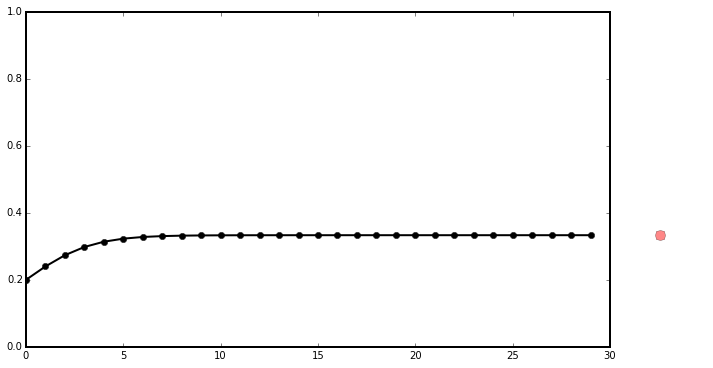

In [57]:
def logistic(r=1.0, N = 100, x0=0.2):
    x = np.zeros(N)
    x[0] = x0
    for n in range(N-1):
        x[n+1] = r * x[n] * (1. - x[n])
    plt.figure(figsize=size)
    ax1 = plt.subplot2grid((1,8), (0,0), colspan=7)
    ax2 = plt.subplot2grid((1,8), (0,7), colspan=1)
    
    ax1.plot(x, '-ok', linewidth=2)
    ax1.set_ylim(0,1)
    n = int(round(N/5))
    ax2.plot([0]*n,x[-n:],'or',markersize=10,alpha=0.1)
    ax2.set_ylim(0,1)
    ax2.axis('off')
    
interact(logistic,r=fixed(1.5),N=fixed(30),x0=(0.00,1,0.01));


No; any $x_0$ in $(0,1)$ will give a sequence approaching $1/3$.  We say that
$0$ is an unstable equilibrium, while $1/3$ is a stable equilibrium.

Play around with the sliders below, and see if you can answer the following:

1. For what values of $r$ does $x_n \to 0$?

2. What happens for slightly bigger values of $r$?

3. Can you find values of $r$ that generate periodic orbits (i.e., situation #2 from our list above)?

4. How many different points are visited in the periodic case?

5. What happens for even bigger values of $r$?

6. Make sure to try the value $r=3.83$.  What do you observe?

Do your conclusions depend on $N$ or $x_0$?

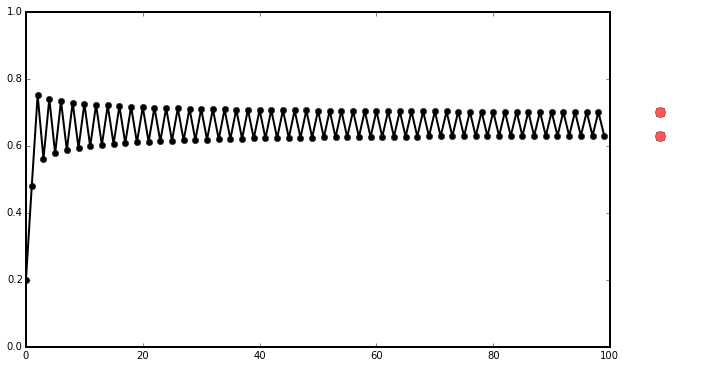

In [62]:
interact(logistic,r=(0,4,0.01),x0=(0.01,1,0.1));


Here's another way of visualizing the sequences:

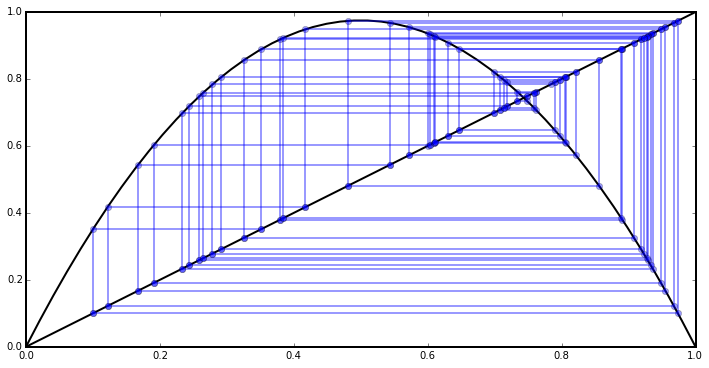

In [59]:
def plot_logistic_parabola(r=1.0,N=100,x0=0.6,j=1):
    x = logistic_map_sequence(r,N,x0)
    xx = np.linspace(0,1)
    yy = r*xx*(1-xx)
    plt.figure(figsize=size)
    plt.plot(xx,yy,'k',linewidth=2)
    plt.hold(True)
    plt.plot(xx,xx,'k',linewidth=2);
    for i in range(j-1):
        plt.plot([x[i],x[i],x[i+1]],[x[i],x[i+1],x[i+1]],'o-b',linewidth=2,alpha=0.4)
        
interact(plot_logistic_parabola,r=(0,4,0.1),j=(1,100,1));


There's a better way to see the whole range of behavior.  In the plots below, we'll use $r$ itself as the $x$-axis, and just show the last part of the sequence of values $x_n$ for each computation (i.e., the red dots from the plot above).

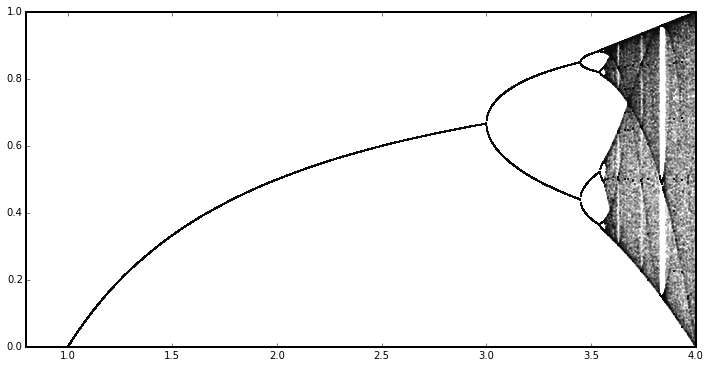

In [60]:
def bifurcation_diagram(r=(0.8,4),N=2000,k=2000,m=200,x0=0.2):
    """
        r: Pair of numbers (rmin,rmax) indicating parameter range
        k: Number of samples in r
        N: Number of iterations per sequence
        m: keep just the last m iterates
    """
    x = np.zeros((k,N))
    vals = np.zeros((k,m))
    rs = np.linspace(r[0],r[1],k)
    x[:,0] = x0
    for n in range(N-1):
        x[:,n+1] = rs * x[:,n] * (1. - x[:,n])
    return rs, x[:,-m:]

plotargs = {'markersize':0.5, 'alpha':0.4}
rs, vals = bifurcation_diagram()
plt.figure(figsize=size)   
plt.plot(rs,vals,'ok',**plotargs);
plt.xlim(rs.min(),rs.max());


This beautiful structure has some amazing properties.  It's easy to see the first few "period doublings": 1, 2, 4, 8, etc.  In fact, if you zoom in on that part there is an infinite sequence of doublings!  

But what happens next is even more incredible: **chaos**.  See the regions where almost everything seems to be filled in?  In fact, if we set $N$ and $m$ large enough, those regions *would* fill in completely.  Regardless of the value of $x_0$, the computed sequence will include values arbitrarily close to each real number in certain intervals.  These sequences never repeat.

The last aspect of this figure is the most jolting: it is fractal.  That is, if you zoom in on any region of it, you find more periodic and chaotic sections.  Zooming in on those reveals additional fine structure, and so forth.  Here are some examples; each plot below is a zoom of the blue shaded rectangle in the preceding plot.

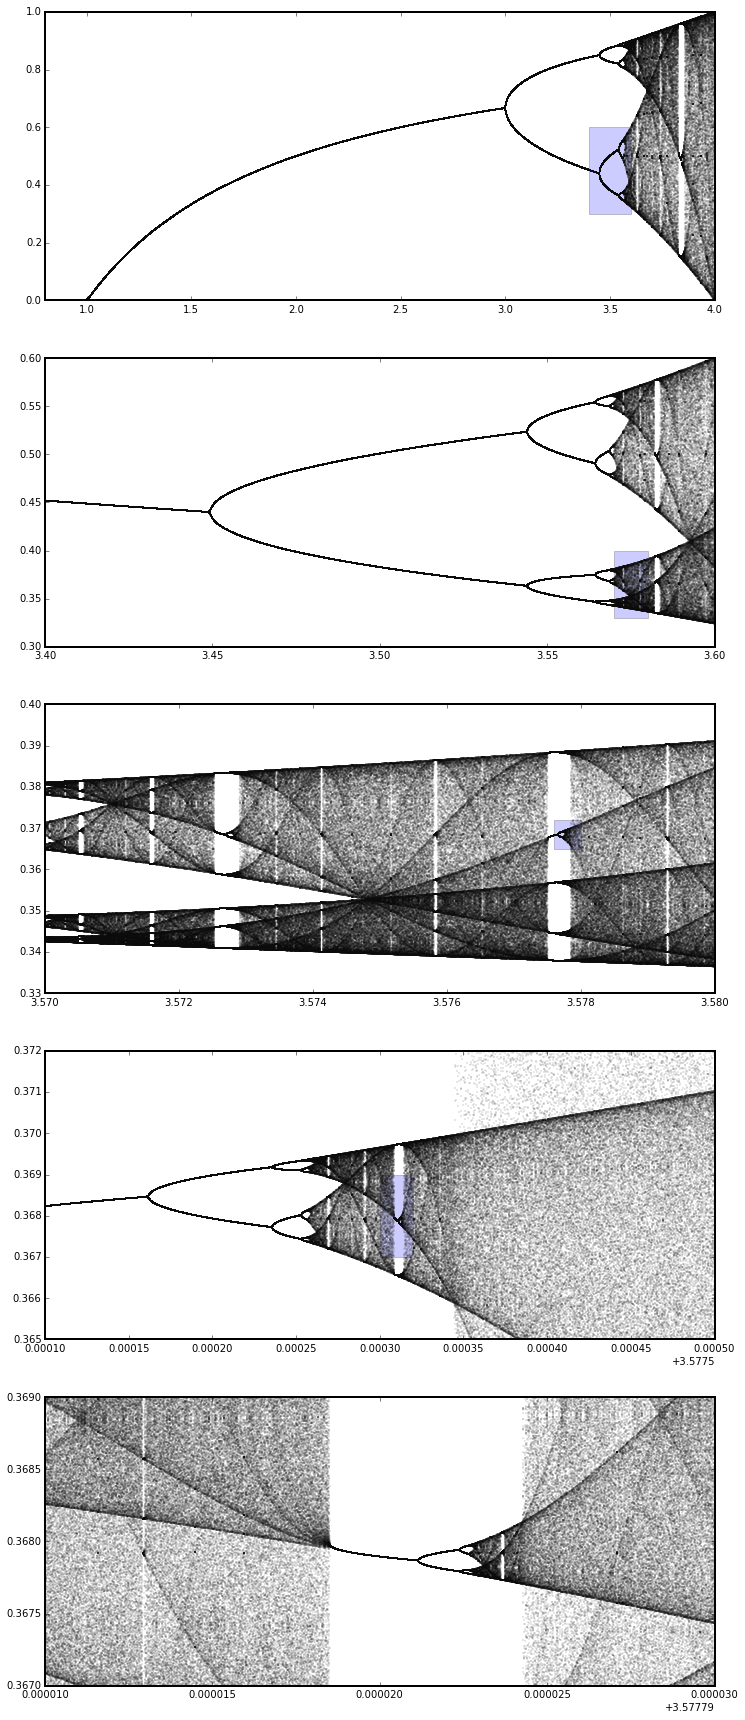

In [61]:
from matplotlib.patches import Rectangle
boxes=((0.8,4,0,1),
       (3.4,3.6,0.3,0.6),
       (3.57,3.58,0.33,0.40),
       (3.5776,3.578,0.365,0.372),
       (3.5778,3.57782,0.367,0.369))

fig, ax = plt.subplots(len(boxes),1,figsize=(12,6*len(boxes)))


for i, box in enumerate(boxes):
    m = int(round(200*1./np.sqrt((box[3]-box[2]))))
    N = 5*m
    rs, vals = bifurcation_diagram((box[0],box[1]),m=m,N=N)
    ax[i].plot(rs,vals,'ok',**plotargs)
    if i<len(boxes)-1:
        nextbox = boxes[i+1]
        ax[i].add_patch(Rectangle((nextbox[0], nextbox[2]), nextbox[1]-nextbox[0], nextbox[3]-nextbox[2], 
                                         facecolor="blue",alpha=0.2))
    ax[i].set_ylim(box[2],box[3]); ax[i].set_xlim(box[0],box[1])


In fact, it can be proved that any system exhibiting cycles of period three (remember what you saw with $r=3.83$ earlier?) must also exhibit chaotic behavior for some other parameter values.  This was made famous in James Yorke's paper "Period 3 implies chaos", but was in fact proven earlier by Sarkovskii.